The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (‘yes’) or not (‘no’) subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).

Bank client data:

Age (numeric)
Job : type of job (categorical: ‘admin.’, ‘blue-collar’, ‘entrepreneur’, ‘housemaid’, ‘management’, ‘retired’, ‘self-employed’, ‘services’, ‘student’, ‘technician’, ‘unemployed’, ‘unknown’)
Marital : marital status (categorical: ‘divorced’, ‘married’, ‘single’, ‘unknown’ ; note: ‘divorced’ means divorced or widowed)
Education (categorical: ‘basic.4y’, ‘basic.6y’, ‘basic.9y’, ‘high.school’, ‘illiterate’, ‘professional.course’, ‘university.degree’, ‘unknown’)
Default: has credit in default? (categorical: ‘no’, ‘yes’, ‘unknown’)
Housing: has housing loan? (categorical: ‘no’, ‘yes’, ‘unknown’)
Loan: has personal loan? (categorical: ‘no’, ‘yes’, ‘unknown’)

Output variable (desired target):

y: has the client subscribed a term deposit? (binary: ‘yes’, ‘no’)

In [4]:
library(dplyr)
library(gmodels)
library(descr)
library(ggplot2)

In [5]:
data=read.csv(file.choose(),sep = ";",header = T,stringsAsFactors = T)

In [52]:
str(data)

'data.frame':	41188 obs. of  23 variables:
 $ age           : int  56 57 37 40 56 45 59 41 24 25 ...
 $ job           : Factor w/ 12 levels "admin.","blue-collar",..: 4 8 8 1 8 8 1 2 10 8 ...
 $ marital       : Factor w/ 4 levels "divorced","married",..: 2 2 2 2 2 2 2 2 3 3 ...
 $ education     : Factor w/ 8 levels "basic.4y","basic.6y",..: 1 4 4 2 4 3 6 8 6 4 ...
 $ default       : Factor w/ 3 levels "no","unknown",..: 1 2 1 1 1 2 1 2 1 1 ...
 $ housing       : Factor w/ 3 levels "no","unknown",..: 1 1 3 1 1 1 1 1 3 3 ...
 $ loan          : Factor w/ 3 levels "no","unknown",..: 1 1 1 1 3 1 1 1 1 1 ...
 $ contact       : Factor w/ 2 levels "cellular","telephone": 2 2 2 2 2 2 2 2 2 2 ...
 $ month         : Factor w/ 10 levels "apr","aug","dec",..: 7 7 7 7 7 7 7 7 7 7 ...
 $ day_of_week   : Factor w/ 5 levels "fri","mon","thu",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ duration      : int  261 149 226 151 307 198 139 217 380 50 ...
 $ campaign      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ pdays         : i

In [7]:
dim(data)

[1] 41188    21

Now finding the portion of data

In [7]:
sum(is.na(data))

[1] 0

No missing value present

In [8]:
data= data %>%
  mutate(term_deposit=if_else(y=="yes","have term deposit","dont have term deposit"))
data$term_deposit=as.factor(data$term_deposit)

In [9]:
CrossTable(data$term_deposit)

   Cell Contents 
|-------------------------|
|                       N | 
|           N / Row Total | 
|-------------------------|

| dont have term deposit |      have term deposit |
|------------------------|------------------------|
|                  36548 |                   4640 |
|                  0.887 |                  0.113 |
|------------------------|------------------------|


This is an unbalanced two-levels categorical variable, 88.7% of values taken are "dont have term deposit and only 11.3% of the values are “ have term deposit".

In [15]:
sum(data=="unknown")

[1] 12718

There are plenty unknown values

Now finding the distribution of agewise data of having term deposits

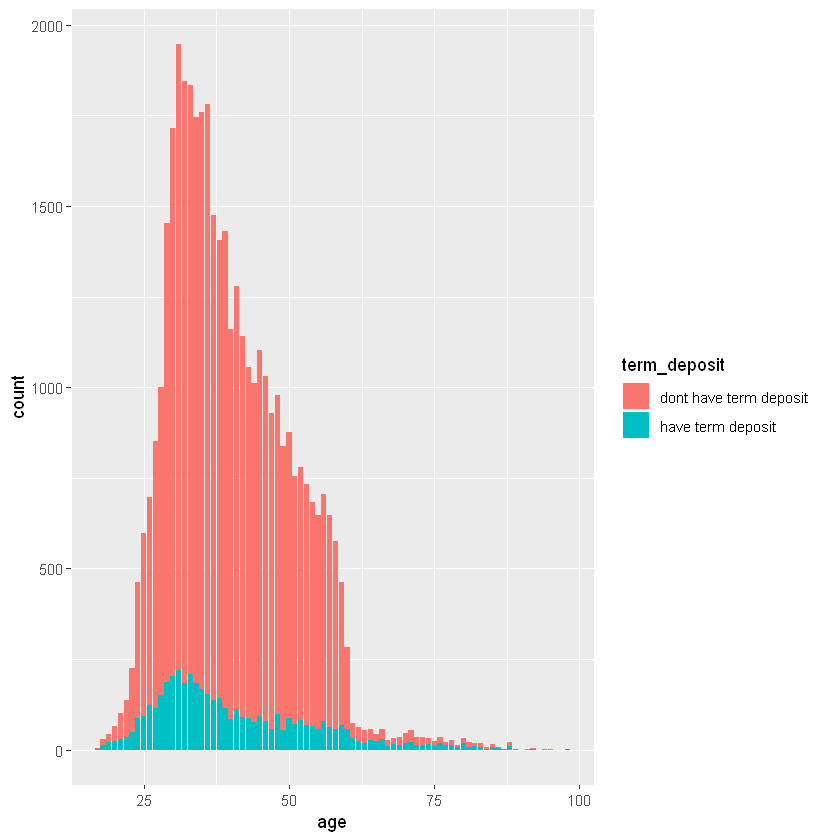

In [12]:
ggplot(data, aes(x=age,fill=term_deposit)) + geom_bar()

In [11]:
library(descr)

Dividing the age group into senior citizen, medium age group and gen -z

In [45]:
data$age_bar=if_else(data$age>60,"senior_citizen",if_else(data$age>30,'medium_age','Gen_z'))

In [51]:
data$age_bar=as.factor(data$age_bar)

   Cell Contents 
|-------------------------|
|                   Count | 
|             Row Percent | 
|-------------------------|

                  data$term_deposit
data$age_bar      dont have term deposit   have term deposit   Total
--------------------------------------------------------------------
Gen_z                              6259                1124    7383 
                                   84.8%               15.2%   17.9%
--------------------------------------------------------------------
medium_age                        29793                3102   32895 
                                   90.6%                9.4%   79.9%
--------------------------------------------------------------------
senior_citizen                      496                 414     910 
                                   54.5%               45.5%    2.2%
--------------------------------------------------------------------
Total                             36548                4640   41188 

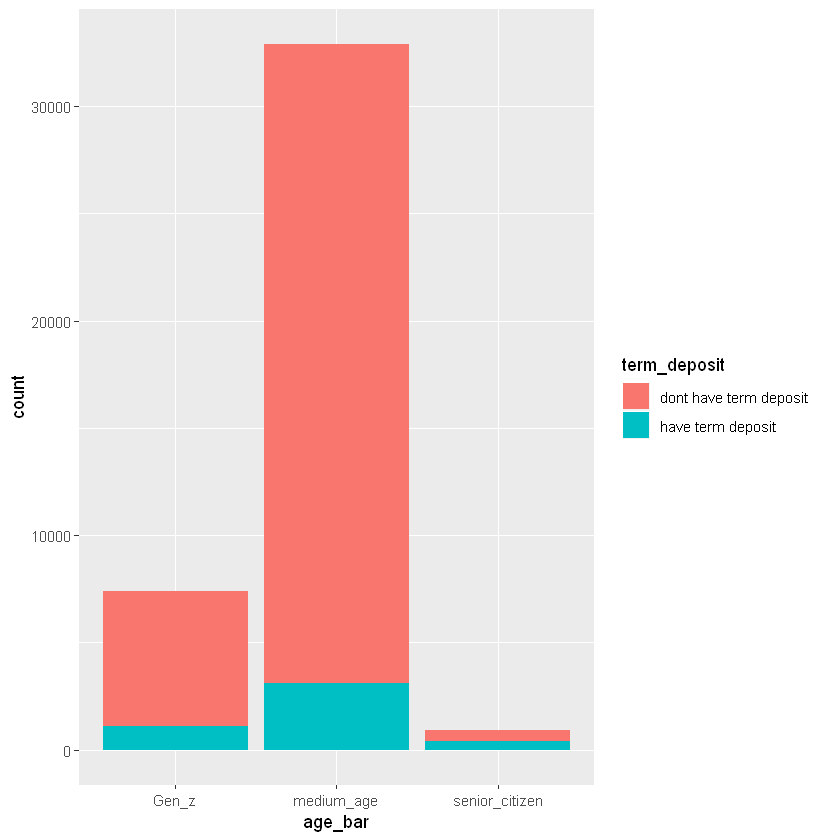

In [54]:
ggplot(data,aes(x=age_bar,fill=term_deposit))+geom_bar()
crosstab(data$age_bar,data$term_deposit,prop.r = T,plot = FALSE)

Senior Citizen tends to have more term deposits as compared to other age group

In [47]:
age_group=data %>%
  mutate(age_bar=if_else(age>60,"senior_citizen",if_else(age>30,'medium_age','Gen_z'))) %>%
  group_by(age_bar) %>%
  summarise(count=n())

In [49]:
age_group

age_bar,count
Gen_z,7383
medium_age,32895
senior_citizen,910


   Cell Contents 
|-------------------------|
|                   Count | 
|             Row Percent | 
|-------------------------|

                 data$term_deposit
data$job         dont have term deposit   have term deposit   Total
-------------------------------------------------------------------
admin.                            9070                1352   10422 
                                  87.0%               13.0%   25.3%
-------------------------------------------------------------------
blue-collar                       8616                 638    9254 
                                  93.1%                6.9%   22.5%
-------------------------------------------------------------------
entrepreneur                      1332                 124    1456 
                                  91.5%                8.5%    3.5%
-------------------------------------------------------------------
housemaid                          954                 106    1060 
                

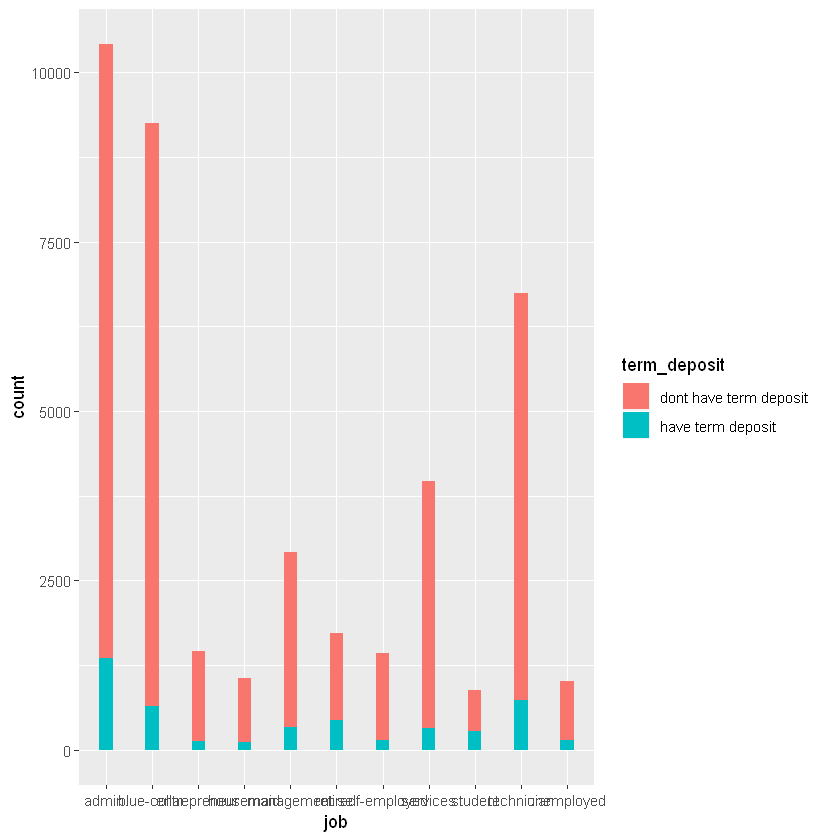

In [65]:
data %>%
  filter(job !="unknown") %>%
ggplot(aes(x=job,fill=term_deposit))+geom_bar(width=0.3)
crosstab(data$job,data$term_deposit,prop.r = TRUE, plot = FALSE)

Surprisingly, students (31.4%), retired people (25.2%) and unemployed (14.2%) categories show the best count of term deposit subscription. 

   Cell Contents 
|-------------------------|
|                   Count | 
|             Row Percent | 
|-------------------------|

                data$term_deposit
data$marital    dont have term deposit   have term deposit   Total
------------------------------------------------------------------
divorced                         4136                 476    4612 
                                 89.7%               10.3%   11.2%
------------------------------------------------------------------
married                         22396                2532   24928 
                                 89.8%               10.2%   60.5%
------------------------------------------------------------------
single                           9948                1620   11568 
                                 86.0%               14.0%   28.1%
------------------------------------------------------------------
unknown                            68                  12      80 
                             

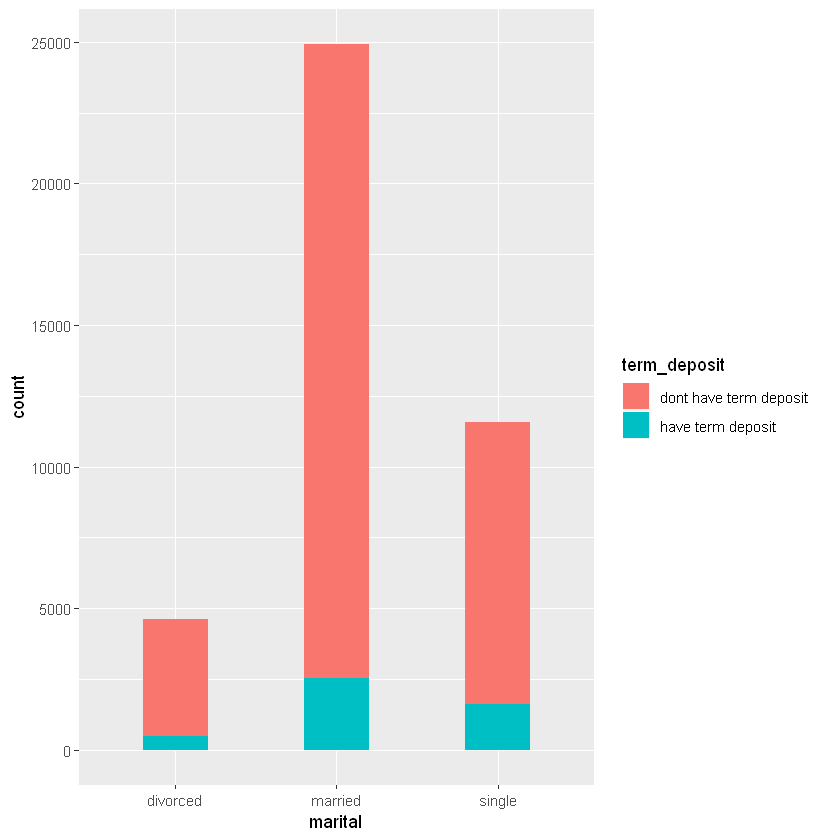

In [66]:
data %>%
  filter(marital !="unknown") %>%
ggplot(aes(x=marital,fill=term_deposit))+geom_bar(width=0.4)
crosstab(data$marital,data$term_deposit,prop.r = TRUE,plot=FALSE)


Single goes for more term deposits(14%) as compared to others

   Cell Contents 
|-------------------------|
|                   Count | 
|             Row Percent | 
|-------------------------|

                       data$term_deposit
data$education         dont have term deposit   have term deposit   Total
-------------------------------------------------------------------------
basic.4y                                3748                 428    4176 
                                        89.8%               10.2%   10.1%
-------------------------------------------------------------------------
basic.6y                                2104                 188    2292 
                                        91.8%                8.2%    5.6%
-------------------------------------------------------------------------
basic.9y                                5572                 473    6045 
                                        92.2%                7.8%   14.7%
-------------------------------------------------------------------------
high.school 

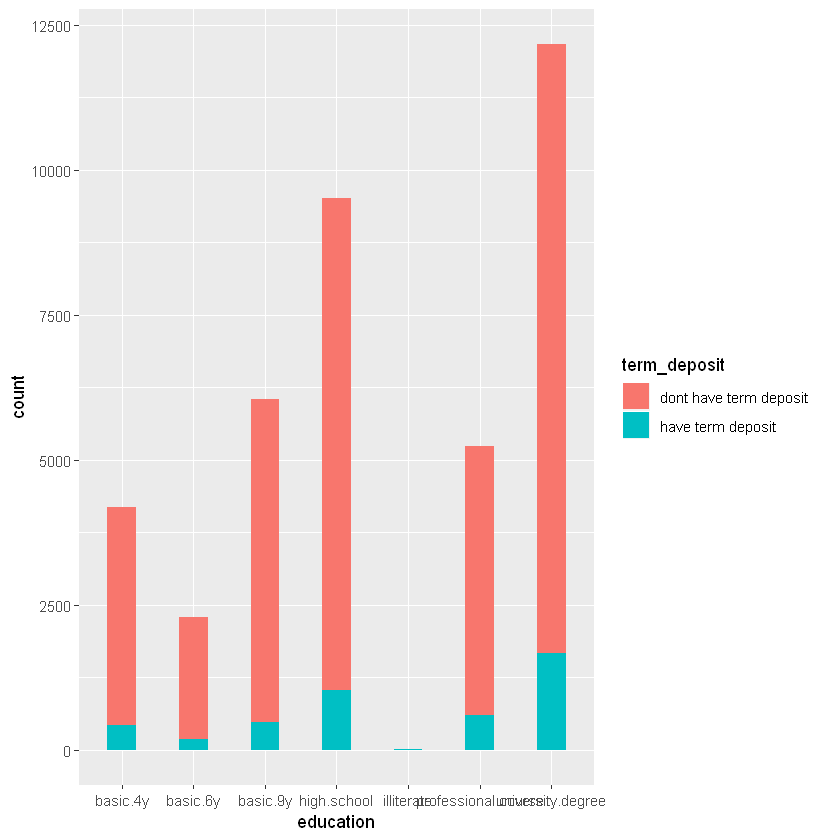

In [39]:
data %>%
  filter(education !="unknown") %>%
ggplot(aes(x=education,fill=term_deposit))+geom_bar(width=0.4)
crosstab(data$education,data$term_deposit,prop.r = TRUE,plot = FALSE)

Among the 1,480 rows containing the “unknown” value, 251 of them subscribed to a term deposit. This is around 5% of the total group of subscribers. Since we’re facing a very unbalanced dependent variable situation, we can not afford to discard those rows.

In [32]:
CrossTable(data$default)

   Cell Contents 
|-------------------------|
|                       N | 
|           N / Row Total | 
|-------------------------|

|        no |   unknown |       yes |
|-----------|-----------|-----------|
|     32588 |      8597 |         3 |
|     0.791 |     0.209 |     0.000 |
|-----------|-----------|-----------|


This data is not very appropriate to use as there are more that 20% of unknown data and only 3 person replied as yes


   Cell Contents 
|-------------------------|
|                   Count | 
|             Row Percent | 
|-------------------------|

                data$term_deposit
data$housing    dont have term deposit   have term deposit   Total
------------------------------------------------------------------
no                              16596                2026   18622 
                                 89.1%               10.9%   45.2%
------------------------------------------------------------------
unknown                           883                 107     990 
                                 89.2%               10.8%    2.4%
------------------------------------------------------------------
yes                             19069                2507   21576 
                                 88.4%               11.6%   52.4%
------------------------------------------------------------------
Total                           36548                4640   41188 


	Pearson's Chi-squared test

data:  data$housing and data$y
X-squared = 5.6845, df = 2, p-value = 0.05829


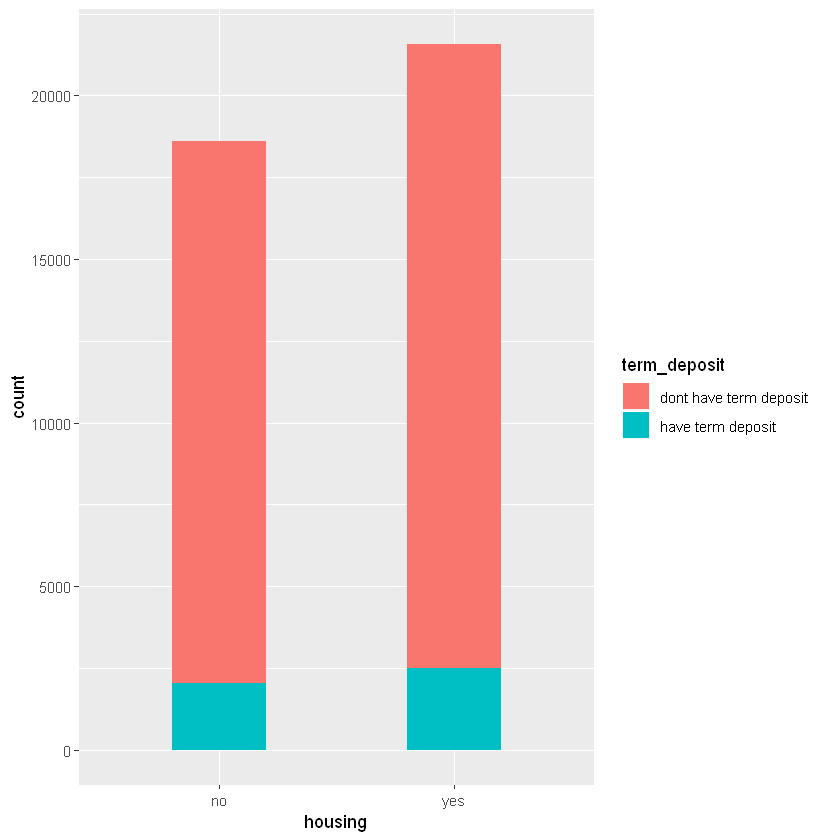

In [50]:
#Housing loan

data %>%
  filter(housing !="unknown") %>%
ggplot(aes(x=housing,fill=term_deposit))+geom_bar(width=0.4)
     crosstab(data$housing,data$term_deposit,prop.r = TRUE, plot = FALSE)

chisq.test(data$housing,data$y)



here is p value is more than 0.05. hence there is no association, hence removing the variable.


   Cell Contents 
|-------------------------|
|                   Count | 
|             Row Percent | 
|-------------------------|

             data$term_deposit
data$loan    dont have term deposit   have term deposit   Total
---------------------------------------------------------------
no                           30100                3850   33950 
                              88.7%               11.3%   82.4%
---------------------------------------------------------------
unknown                        883                 107     990 
                              89.2%               10.8%    2.4%
---------------------------------------------------------------
yes                           5565                 683    6248 
                              89.1%               10.9%   15.2%
---------------------------------------------------------------
Total                        36548                4640   41188 


	Pearson's Chi-squared test

data:  data$loan and data$y
X-squared = 1.094, df = 2, p-value = 0.5787


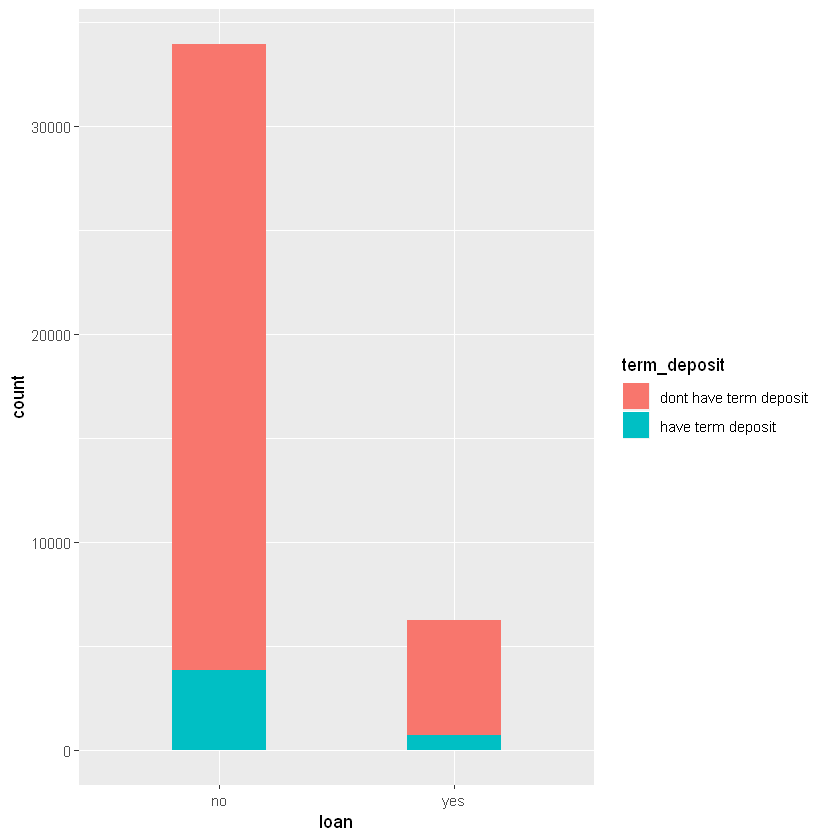

In [68]:
# Personal loan

data %>%
  filter(loan !="unknown") %>%
  ggplot(aes(x=loan,fill=term_deposit))+geom_bar(width=0.4)
crosstab(data$loan,data$term_deposit,prop.r = T,plot = FALSE)
chisq.test(data$loan,data$y)

Here the P value is greater than 0.05 ,hence no association. Removing the variable will be better.

In [69]:
crosstab(data$contact,data$term_deposit,prop.r = T,plot = FALSE)

   Cell Contents 
|-------------------------|
|                   Count | 
|             Row Percent | 
|-------------------------|

                data$term_deposit
data$contact    dont have term deposit   have term deposit   Total
------------------------------------------------------------------
cellular                        22291                3853   26144 
                                 85.3%               14.7%   63.5%
------------------------------------------------------------------
telephone                       14257                 787   15044 
                                 94.8%                5.2%   36.5%
------------------------------------------------------------------
Total                           36548                4640   41188 

This feature is really interesting, 14.7% of cellular responders subscribed to a term deposit while only 5.2% of telephone responders did.